# Exp 4

In [ ]:
import numpy as np
import pandas as pd
#dataset-link: https://drive.google.com/file/d/1jVbadSxE7eMnafvSYqfxLWFoGpN4E7va/view?usp=sharing
red_wine = pd.read_csv('winequality-red.csv')
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [ ]:
max_, min_ = df_train.max(axis=0), df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [ ]:
X_train, y_train = df_train.drop('quality', axis=1), df_train['quality']
X_valid, y_valid = df_valid.drop('quality', axis=1), df_valid['quality']

In [ ]:
X_train.shape

(1119, 11)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def make_model(act):
    model = keras.Sequential([
        keras.Input(shape=[11]),
        layers.Dense(512, activation=act),
        layers.Dense(512, activation=act),
        layers.Dense(512, activation=act),
        layers.Dense(1),
    ])
    model.compile(optimizer='adam', loss='mse')
    return model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        batch_size=256,
        epochs=10,
    )

historySig = make_model('sigmoid')
historyRelu = make_model('relu')
historyTanh = make_model('tanh')
historySoft = make_model('softmax')

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 1.1268 - val_loss: 1.1119
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6012 - val_loss: 0.5849
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.3657 - val_loss: 0.2536
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2468 - val_loss: 0.0275
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0630 - val_loss: 0.0968
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0691 - val_loss: 0.0711
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0642 - val_loss: 0.0282
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0330 - val_loss: 0.0437
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0362 - val_loss: 0.0369
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0354 - val_loss: 0.0284
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.1536 - val_loss: 0.0286
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0306 - val_loss: 0.0350
Ep

<Axes: >

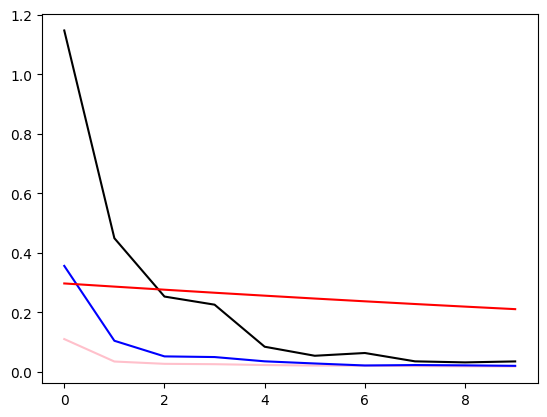

In [ ]:
# Sigmoid
history_df = pd.DataFrame(historySig.history)
history_df['loss'].plot(color='black')

# Relu
history_df = pd.DataFrame(historyRelu.history)
history_df['loss'].plot(color='pink')

# Tanh
history_df = pd.DataFrame(historyTanh.history)
history_df['loss'].plot(color='blue')

# Softmax
history_df = pd.DataFrame(historySoft.history)
history_df['loss'].plot(color='red')